In [213]:
import pandas as pd 
import numpy as np
print("reading..")
df = pd.read_csv('all.csv')
print(df)
sdf = pd.DataFrame(df)
sdf = sdf.drop(['type','time','month','day'], axis = 1);
mean = sdf['CO2'].mean()
sdf.fillna(mean,inplace = True)
print(sdf)

reading..
       type  time     H2S   NH3     CO2  label  month  day
0   chicken   0.0    6.07  0.04  1988.0      0      9    1
1   chicken   1.0    4.75  0.05  1990.0      1      9    1
2   chicken   3.5    4.50  0.02  1988.0      2      9    1
3   chicken   6.5    4.89  0.02  1988.0      2      9    1
4   chicken   NaN    6.57  0.03  1986.0      2      9    1
..      ...   ...     ...   ...     ...    ...    ...  ...
71  chicken   8.0  153.04  0.16   158.0      2     10    5
72  chicken   0.0   77.65  0.06   158.0      0     10    6
73  chicken   1.0   89.21  0.09   158.0      1     10    6
74  chicken   2.0   94.63  0.10   158.0      1     10    6
75  chicken   3.0  112.75  0.11   158.0      1     10    6

[76 rows x 8 columns]
       H2S   NH3     CO2  label
0     6.07  0.04  1988.0      0
1     4.75  0.05  1990.0      1
2     4.50  0.02  1988.0      2
3     4.89  0.02  1988.0      2
4     6.57  0.03  1986.0      2
..     ...   ...     ...    ...
71  153.04  0.16   158.0      2
72 

In [214]:
print("splitting")
x = sdf.drop(['label'], axis = 1);
y = sdf['label']
print(x)
print(y)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

splitting
       H2S   NH3     CO2
0     6.07  0.04  1988.0
1     4.75  0.05  1990.0
2     4.50  0.02  1988.0
3     4.89  0.02  1988.0
4     6.57  0.03  1986.0
..     ...   ...     ...
71  153.04  0.16   158.0
72   77.65  0.06   158.0
73   89.21  0.09   158.0
74   94.63  0.10   158.0
75  112.75  0.11   158.0

[76 rows x 3 columns]
0     0
1     1
2     2
3     2
4     2
     ..
71    2
72    0
73    1
74    1
75    1
Name: label, Length: 76, dtype: int64


In [215]:
from sklearn import svm
print("SVM:")
print("rbf-")
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
svm_predict = clf.predict(x_test)
print(list(svm_predict))
print(list(y_test))
print(clf.score(x_test,y_test))

print("linear-")
clf = svm.SVC(kernel='linear')
clf.fit(x_train,y_train)
svm_predict = clf.predict(x_test)
print(list(svm_predict))
print(list(y_test))
print(clf.score(x_test,y_test))

print("poly-")
clf = svm.SVC(kernel='poly')
clf.fit(x_train,y_train)
svm_predict = clf.predict(x_test)
print(list(svm_predict))
print(list(y_test))
print(clf.score(x_test,y_test))

print("sigmoid-")
clf = svm.SVC(kernel='sigmoid')
clf.fit(x_train,y_train)
svm_predict = clf.predict(x_test)
print(list(svm_predict))
print(list(y_test))
print(clf.score(x_test,y_test))

print("alltwo")
number = 0
for item in y_test:
    if item == 2:
        number+=1

print(number/len(y_test))

SVM:
rbf-
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 1, 2, 1, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2]
0.5
linear-
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 1, 2, 1, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2]
0.5
poly-
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 1, 2, 1, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2]
0.5
sigmoid-
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 1, 2, 1, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2]
0.5
alltwo
0.5


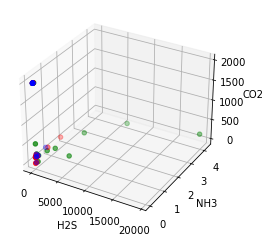

10
29
37


In [216]:
import matplotlib.pyplot as plt

H2S_zero = []
NH3_zero = []
CO2_zero = []
H2S_one = []
NH3_one = []
CO2_one = []
H2S_two = []
NH3_two = []
CO2_two = []
for i in range(len(sdf)):
    if sdf['label'][i] == 0:
        H2S_zero.append(sdf['H2S'][i])
        NH3_zero.append(sdf['NH3'][i])
        CO2_zero.append(sdf['CO2'][i])
    elif sdf['label'][i] == 1:
        H2S_one.append(sdf['H2S'][i])
        NH3_one.append(sdf['NH3'][i])
        CO2_one.append(sdf['CO2'][i])
    else:
        H2S_two.append(sdf['H2S'][i])
        NH3_two.append(sdf['NH3'][i])
        CO2_two.append(sdf['CO2'][i])

H2S_zero = np.array(H2S_zero)
NH3_zero = np.array(NH3_zero)
CO2_zero = np.array(CO2_zero)
H2S_one = np.array(H2S_one)
NH3_one = np.array(NH3_one)
CO2_one = np.array(CO2_one)
H2S_two = np.array(H2S_two)
NH3_two = np.array(NH3_two)
CO2_two = np.array(CO2_two)

fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('H2S')
ax.set_ylabel('NH3')
ax.set_zlabel('CO2')
ax.scatter(H2S_zero,NH3_zero,CO2_zero,c='Blue')
ax.scatter(H2S_one,NH3_one,CO2_one,c='Red')
ax.scatter(H2S_two,NH3_two,CO2_two,c='Green')
plt.show()
print(len(H2S_zero))
print(len(H2S_one))
print(len(H2S_two))

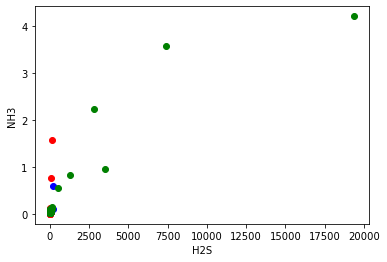

In [217]:
fig = plt.figure()  
ax = fig.add_subplot(111)
ax.set_xlabel('H2S')
ax.set_ylabel('NH3')
ax.scatter(H2S_zero,NH3_zero,c='Blue')
ax.scatter(H2S_one,NH3_one,c='Red')
ax.scatter(H2S_two,NH3_two,c='Green')
plt.show()

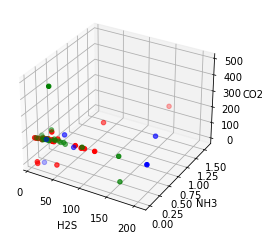

In [218]:
H2S_zero = []
NH3_zero = []
CO2_zero = []
H2S_one = []
NH3_one = []
CO2_one = []
H2S_two = []
NH3_two = []
CO2_two = []
for i in range(len(sdf)):
    if sdf['CO2'][i] < 1000 and sdf['H2S'][i] < 400:
        if sdf['label'][i] == 0:
            H2S_zero.append(sdf['H2S'][i])
            NH3_zero.append(sdf['NH3'][i])
            CO2_zero.append(sdf['CO2'][i])
        elif sdf['label'][i] == 1:
            H2S_one.append(sdf['H2S'][i])
            NH3_one.append(sdf['NH3'][i])
            CO2_one.append(sdf['CO2'][i])
        else:
            H2S_two.append(sdf['H2S'][i])
            NH3_two.append(sdf['NH3'][i])
            CO2_two.append(sdf['CO2'][i])

H2S_zero = np.array(H2S_zero)
NH3_zero = np.array(NH3_zero)
CO2_zero = np.array(CO2_zero)
H2S_one = np.array(H2S_one)
NH3_one = np.array(NH3_one)
CO2_one = np.array(CO2_one)
H2S_two = np.array(H2S_two)
NH3_two = np.array(NH3_two)
CO2_two = np.array(CO2_two)

fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('H2S')
ax.set_ylabel('NH3')
ax.set_zlabel('CO2')
ax.scatter(H2S_zero,NH3_zero,CO2_zero,c='Blue')
ax.scatter(H2S_one,NH3_one,CO2_one,c='Red')
ax.scatter(H2S_two,NH3_two,CO2_two,c='Green')
plt.show()

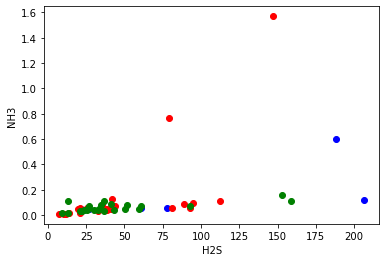

In [219]:
fig = plt.figure()  
ax = fig.add_subplot(111)
ax.set_xlabel('H2S')
ax.set_ylabel('NH3')
ax.scatter(H2S_zero,NH3_zero,c='Blue')
ax.scatter(H2S_one,NH3_one,c='Red')
ax.scatter(H2S_two,NH3_two,c='Green')
plt.show()